# ***Regresión: Inversión en una tienda de videojuegos***
1. Preparación de Datos
2. División de los datos
3. Aprendizaje del Modelo
4. Evaluación del Modelo
5. Guardamos el modelo


In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
#Cargamos los datos
data = pd.read_csv("videojuegos.csv")
data.head()

,videojuego,Edad,Sexo,Plataforma,Consumidor_habitual,Presupuesto para invertir
0,'Mass Effect',29,Mujer,PC,True,200
1,'Sim City',27,Mujer,Otros,True,600
2,'Dead Space',22,Hombre,'Xbox',False,200
3,'Battlefield',28,Mujer,'Xbox',True,370
4,'KOA: Reckoning',30,Mujer,PC,True,100


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   videojuego                 152 non-null    category
 1   Edad                       152 non-null    int64   
 2   Sexo                       152 non-null    category
 3   Plataforma                 152 non-null    category
 4   Consumidor_habitual        152 non-null    category
 5   Presupuesto para invertir  152 non-null    int64   
dtypes: category(4), int64(2)
memory usage: 3.9 KB


In [4]:
#Correccion de tipos de datos
data['videojuego']=data['videojuego'].astype('category')
data['Sexo']=data['Sexo'].astype('category')
data['Plataforma']=data['Plataforma'].astype('category')
data['Consumidor_habitual']=data['Consumidor_habitual'].astype('category')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   videojuego                 152 non-null    category
 1   Edad                       152 non-null    int64   
 2   Sexo                       152 non-null    category
 3   Plataforma                 152 non-null    category
 4   Consumidor_habitual        152 non-null    category
 5   Presupuesto para invertir  152 non-null    int64   
dtypes: category(4), int64(2)
memory usage: 3.9 KB


In [6]:
#Descripción de variables numéricas
data.describe()

,Edad,Presupuesto para invertir
count,152.000000,152.000000
mean,28.000000,343.289474
std,9.990724,291.945464
min,14.000000,20.000000
25%,21.000000,100.000000
50%,26.000000,275.000000
75%,34.000000,420.000000
max,52.000000,1200.000000


<Axes: >

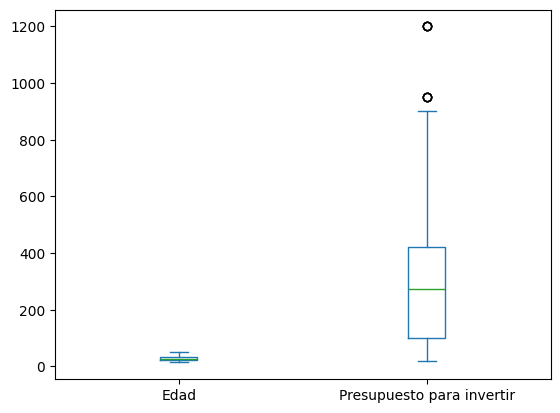

In [9]:
data.plot(kind='box')

<Axes: xlabel='videojuego'>

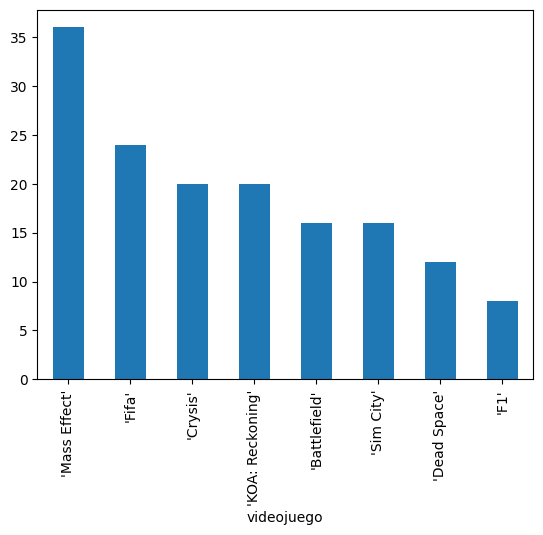

In [10]:
#Descripción variables categóricas
data['videojuego'].value_counts().plot(kind='bar')

<Axes: xlabel='Plataforma'>

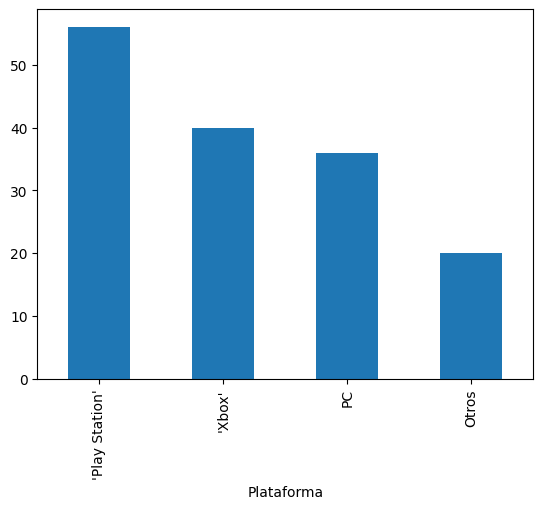

In [11]:
#Descripción variables categóricas
data['Plataforma'].value_counts().plot(kind='bar')

<Axes: xlabel='Sexo'>

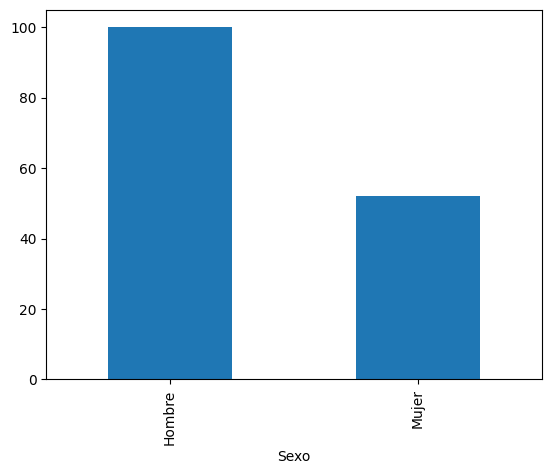

In [12]:
#Descripción variables categóricas
data['Sexo'].value_counts().plot(kind='bar')

<Axes: xlabel='Consumidor_habitual'>

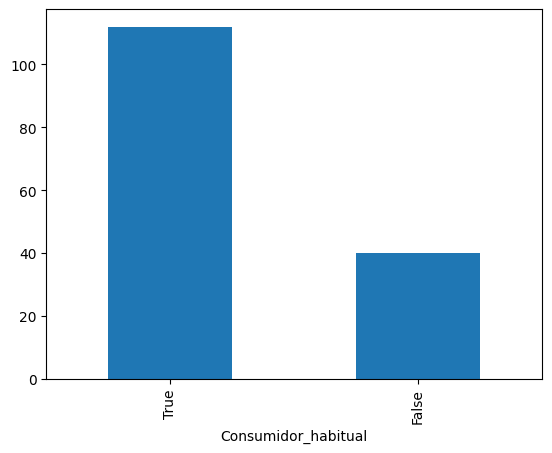

In [13]:
#Descripción variables categóricas
data['Consumidor_habitual'].value_counts().plot(kind='bar')

In [14]:
#Creamos variables dummy para convertir  las categorías a números
data = pd.get_dummies(data, columns=['videojuego', 'Plataforma'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['Sexo', 'Consumidor_habitual'], drop_first=True, dtype=int)
data.head()

#No hay labelencoder-> Variable objetivo ya es numérica

,Edad,Presupuesto para invertir,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
0,29,200,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,27,600,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,22,200,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,28,370,1,0,0,0,0,0,0,0,0,1,0,0,1,1
4,30,100,0,0,0,0,0,1,0,0,0,0,0,1,1,1


<Axes: >

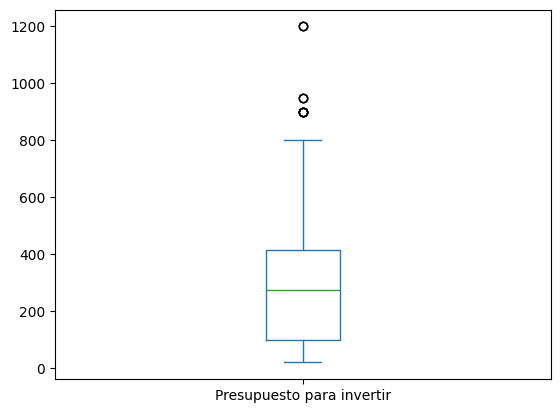

In [15]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Presupuesto para invertir", axis = 1) # Variables predictoras
Y = data['Presupuesto para invertir'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=None)
Y_train.plot(kind='box')

In [16]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeRegressor
model_Tree = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=2, max_depth=None)
model_Tree.fit(X_train, Y_train)#70% entrenamiento

DecisionTreeRegressor(min_samples_leaf=2)

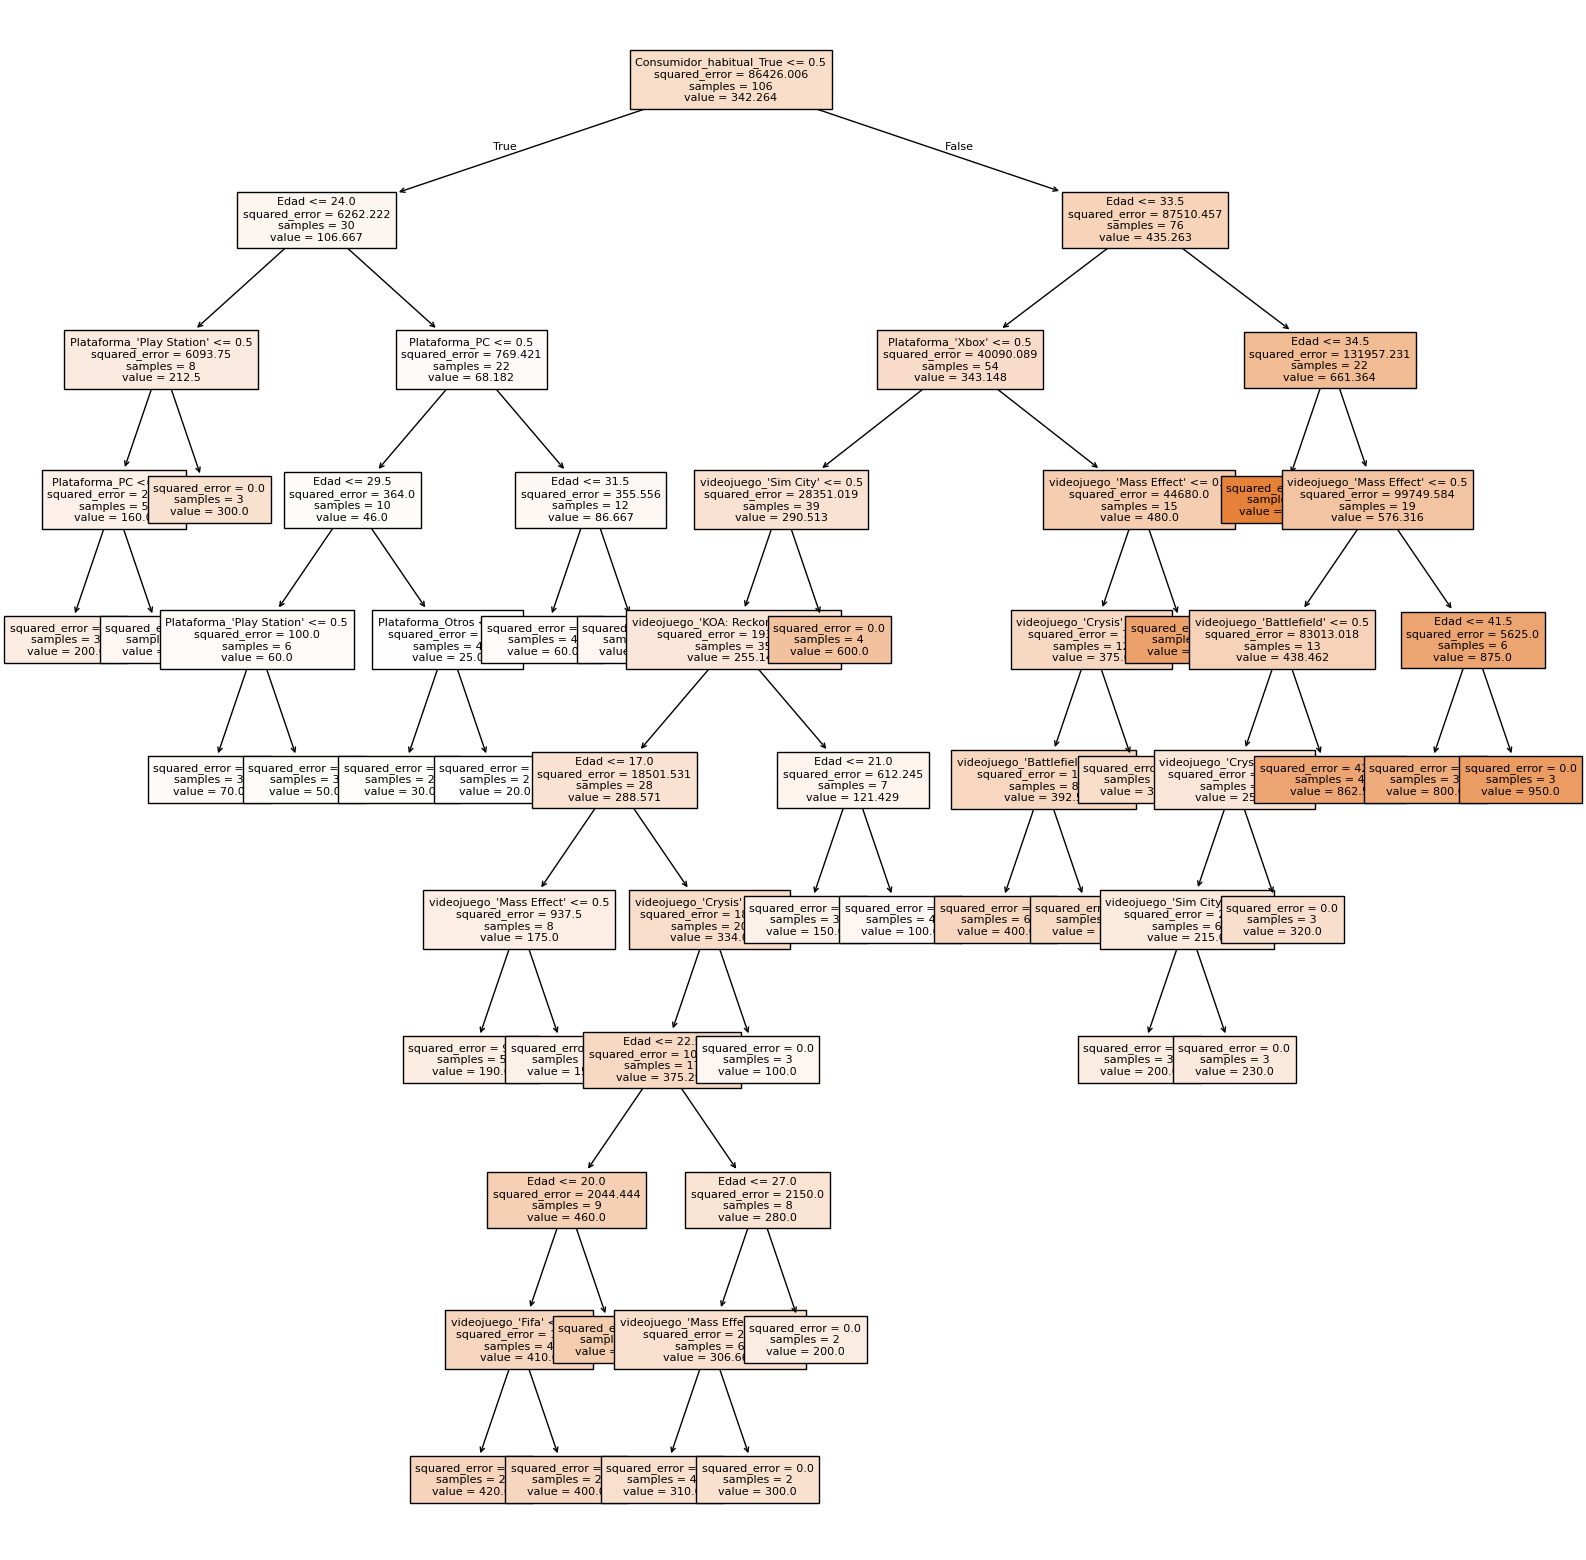

In [17]:
#Graficar el árbol
from sklearn.tree import plot_tree
nombres_variables=X_train.columns.values
plt.figure(figsize=(20,20))
plot_tree(model_Tree, feature_names=nombres_variables, filled=True,fontsize=8)
plt.show()

In [28]:
#Dataframe para comparar los resultados
medidas= pd.DataFrame(index=['mse','rmse','mae','mape','max'])

In [29]:
#Evaluación del árbol 30%
from sklearn import metrics
Y_pred = model_Tree.predict(X_test) #30%

#Medidas de evaluación en regresión
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Arbol']=[mse, rmse, mae, mape,max]
medidas

,Arbol
mse,1090.760870
rmse,33.026669
mae,12.065217
mape,0.026341
max,112.500000


/tmp/ipython-input-2783684465.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


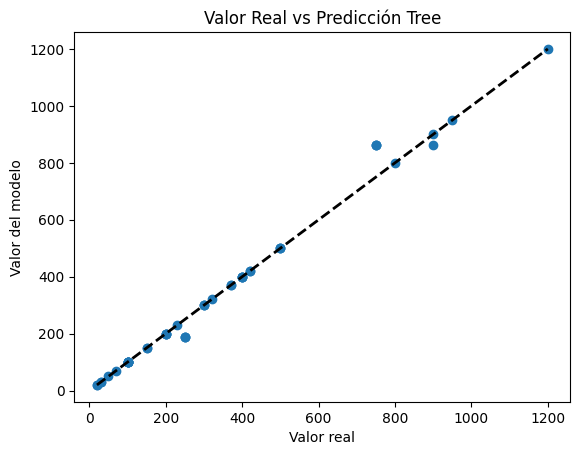

In [30]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Tree')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

In [31]:
#Normalizacion de las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Edad']]) #Se ajustan los paramatros de normalizacion

#se aplica la normalizacion al X_train y X_test
X_train[['Edad']]= min_max_scaler.transform(X_train[['Edad']])
X_test[['Edad']]= min_max_scaler.transform(X_test[['Edad']])
X_train.head()

,Edad,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
92,0.026316,0,0,0,0,0,0,1,0,1,0,0,0,0,1
13,0.289474,0,0,0,0,1,0,0,0,1,0,0,0,0,1
67,0.184211,0,0,0,1,0,0,0,0,1,0,0,0,1,1
95,0.315789,1,0,0,0,0,0,0,0,0,0,1,0,0,0
97,0.789474,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [32]:
from sklearn.neighbors import  KNeighborsRegressor
model_Knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean') #minkowski
model_Knn.fit(X_train, Y_train) #70%

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [33]:
#Evaluación de KNN
from sklearn import metrics

Y_pred = model_Knn.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Knn']=[mse, rmse, mae, mape,max]
print(medidas)

            Arbol  Knn
mse   1090.760870  0.0
rmse    33.026669  0.0
mae     12.065217  0.0
mape     0.026341  0.0
max    112.500000  0.0


/tmp/ipython-input-3092324614.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


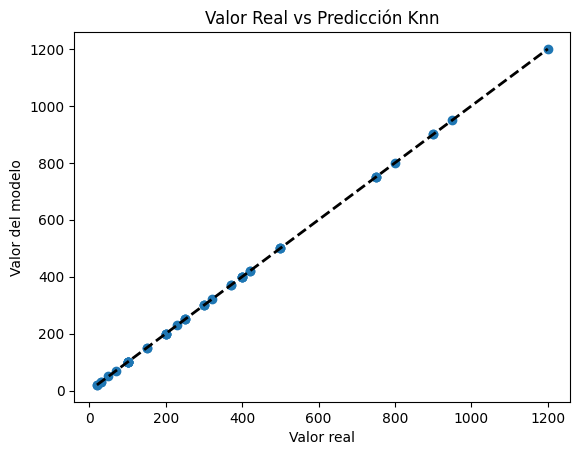

In [34]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Knn')
plt.show()

In [44]:
from sklearn.neural_network import MLPRegressor

model_NN = MLPRegressor(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.3, momentum= 0.2, max_iter=500,  random_state=3)

model_NN.fit(X_train, Y_train)#70%

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=16, learning_rate_init=0.3, max_iter=500,
             momentum=0.2, random_state=3)

            Arbol  Knn           NN
mse   1090.760870  0.0  1159.726611
rmse    33.026669  0.0    34.054759
mae     12.065217  0.0    17.836037
mape     0.026341  0.0     0.087176
max    112.500000  0.0   114.020962


/tmp/ipython-input-2672208428.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


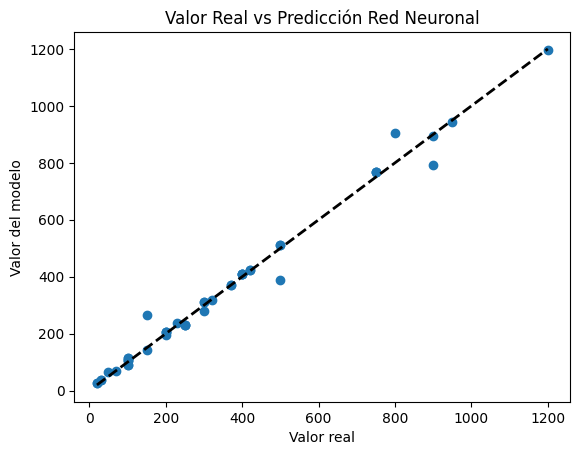

In [45]:
#Evaluación de NN
from sklearn import metrics

Y_pred = model_NN.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['NN']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Red Neuronal')
plt.show()

In [41]:
#SVM
from sklearn.svm import SVR # SVR

modelSVM = SVR(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVR(kernel='linear')

In [47]:
from sklearn import metrics

Y_pred = SVR.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['SVR']=[mse, rmse, mae, mape,max]
print(medidas)

TypeError: BaseLibSVM.predict() missing 1 required positional argument: 'X'

In [46]:
import pickle
filename = 'modelo-reg.pkl'
variables=X.columns._values
pickle.dump([model_Tree, model_Knn, model_NN, min_max_scaler, variables], open(filename, 'wb'))